<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge:" data-toc-modified-id="Challenge:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge:</a></span><ul class="toc-item"><li><span><a href="#Model-Development:--Mathematical-Models" data-toc-modified-id="Model-Development:--Mathematical-Models-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Model Development:</em>  Mathematical Models</a></span></li><li><span><a href="#Model-Validation:-Dam-Simulator" data-toc-modified-id="Model-Validation:-Dam-Simulator-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><em>Model Validation:</em> Dam Simulator</a></span></li></ul></li><li><span><a href="#Exercise-1:-Due-at-the-beginning-of-class-on-Monday,-August-31" data-toc-modified-id="Exercise-1:-Due-at-the-beginning-of-class-on-Monday,-August-31-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 1: Due at the beginning of class on Monday, August 31</a></span><ul class="toc-item"><li><span><a href="#Controller-Design-and-Validation:-Data-collection" data-toc-modified-id="Controller-Design-and-Validation:-Data-collection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><em>Controller Design and Validation</em>: Data collection</a></span></li></ul></li><li><span><a href="#Model-Development:-Constructing-Models-From-Dynamic-Tests" data-toc-modified-id="Model-Development:-Constructing-Models-From-Dynamic-Tests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><em>Model Development:</em> Constructing Models From Dynamic Tests</a></span><ul class="toc-item"><li><span><a href="#Step-Response-Tests" data-toc-modified-id="Step-Response-Tests-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Step Response Tests</a></span></li><li><span><a href="#Experimentally-determining-local-system-stability-from-a-step-response-test" data-toc-modified-id="Experimentally-determining-local-system-stability-from-a-step-response-test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Experimentally determining local system stability from a step response test</a></span></li><li><span><a href="#Steady-State-in-a-step-response-test" data-toc-modified-id="Steady-State-in-a-step-response-test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Steady State in a step response test</a></span></li><li><span><a href="#Steady-State-Gain-in-a-step-response-test" data-toc-modified-id="Steady-State-Gain-in-a-step-response-test-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Steady State Gain in a step response test</a></span></li><li><span><a href="#Linearity:-the-principle-of-superposition" data-toc-modified-id="Linearity:-the-principle-of-superposition-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Linearity: the principle of superposition</a></span></li><li><span><a href="#2%-Settling-Time" data-toc-modified-id="2%-Settling-Time-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>2% Settling Time</a></span></li></ul></li><li><span><a href="#Exercise-2:-Due-at-the-beginning-of-class-on-Monday,-August-31" data-toc-modified-id="Exercise-2:-Due-at-the-beginning-of-class-on-Monday,-August-31-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2: Due at the beginning of class on Monday, August 31</a></span><ul class="toc-item"><li><span><a href="#Model-Development:-Interpret-the-Dam's-behavior" data-toc-modified-id="Model-Development:-Interpret-the-Dam's-behavior-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><em>Model Development</em>: Interpret the Dam's behavior</a></span></li></ul></li></ul></div>

# Challenge:

A friend, who is a successful Lafayette graduate and engineer, likes mountain getaways, fast cars and wants to be proactive about preserving the environment.  So they drive an all-electric Tesla Model S roadster and own property in the Catskills.

The problem is that they love to take long winding routes to and from their mountain home. By the time they arrive, Tesla roadster is usually nearly depleted of charge. Because of the rustic existence at the cabin, there is no power provided by an electric utility, so it is not possible to install a traditional charging station for the car. 

So, after a thorough environmental impact study and after obtaining the proper permits, they decide to build their own small hydroelectric power station to provide electricity to the cabin.  They have enlisted your help with the design of some of the control system that can provide DC power for lights and small electronics, but still have enough voltage (450V) to charge the car at steady state. **When the system is completely finished, it should display a number for the "time to charge" on a screen based on the current water level in the dam, and control the dam's operation to achieve an efficient charge**. 

**Your first step towards completing this challenge is to design a control system to perform a step response test on your friend's dam system, and interpret the data to determine what sort of mathematical model may be appropriate to model the dam's behavior.**

Being an ME480 student, you will use the same overall process as you normally would to help your friend:

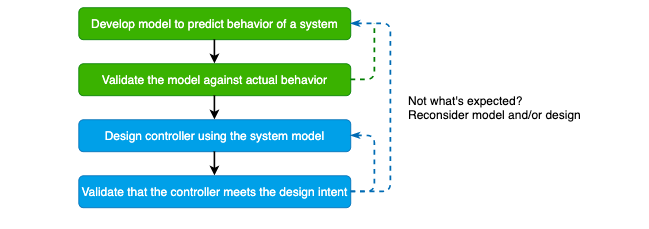


Because you have never designed a control system for a hydroelectric dam before, you need to gather some information about how these systems operate. Some basics of hydroelectric dams are provided in the YouTube video below:

In [7]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/q8HmRLCgDAI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Because your friend is interested in *predicting* how long their car will need to be plugged in to the dam power system in order to charge, you decide that it is important to build a detailed mathematical (ME352-style) model for the Dam system your friend built. 

## *Model Development:*  Mathematical Models

There are many strategies for developing equations of motion that describe the *dynamics* (motion) of a system. You've been exposed to several in your career as an engineering student. In this course, the dynamic models you will see are  *differential equations* that relate a model's inputs to its outputs. In this course, we will use one of two general approaches to develop a system's governing differential equation:

1. **Data-driven approach:** Conduct one or more experiments, and allow the experiments' results to guide model assumptions, complexity and structure. *Validate* the model using a *different* set of experiments that show the model has *predictive* power.
2. **Bottom-up approach:** Begin with physics-based models of each component using appropriate assumptions. Build a model by connecting the system's components and capturing their interactions using the principles of continuity and compatibility.

Both of these approaches can be valid. Often, some combination of both strategies is necessary before a model is complete. Today, we will focus on the first steps towards building a model using a *Data-driven* approach.

## *Model Validation:* Dam Simulator

Since we can't collect data from an actual dam, we'll use the simulator below to get the information we need to model your friend's dam behavior.

In order to determine what may be required of your mathematical model, you wish to collect data from the dam to get a more precise idea of how it acts. The simulator provides you with a sufficient set of Boolean variables you can use to interace with the system.  Initially you will *design a control system* for the dam that *simply allows you to collect data*. 

As part of your efforts to collect data from the dam, you instrumented the generator, turbine, and reservoir. A [data logger](https://en.wikipedia.org/wiki/Data_logger) you bought records data any time a "true" boolean input is given to one of its digital pins.  The data logger will stop capturing and save the data when the pin sees a falling edge of the voltage (transition from true to false) on this pin. Once a falling edge is detected, the system automatically prompts you for a location where the data can be saved as a text file. The simulator shows the format for the columns of the collected data file.

In [8]:
%%html
<iframe id="inlineFrameExample" title="Inline Frame Example" width="1000" height="900" src="https://workbench.lafayette.edu/~brownaa/ME480/damsim/damsim.html"> </iframe>

Your code goes above.

Use only variable names you see in the simulator as well as the variables that are declared below. These variables are already declared as global variables in the simulator, as they would need to be in Arduino code, so you do not have to re-declare them. Their data types are shown for reference only.

```c
boolean VALVE //When true valve is open
int VAVLEPERCENT //How far the valve will open when VALVE is true

boolean REC// when true data will be recorded
//when REC goes from true to false (the "falling" edge), data will be saved to a file

//Integers for your use
int lastStoredTime1
int lastStoredTime2
int lastStoredTime3
int elapsed1
int elapsed2
int elapsed3

//millis() can be called as in Arduino code

//you can use "if" statements with the same format as Arduino code
```

The data file will contain a series of data columns using the format below

| **column** | **1** | **2** | **3** | **4** | **5**| **6** |
|:------:|:-:|:-:|:-:|:-:|:-:|:-:|
|     **data**   | time  |  gauge height (ft) | turbine pressure (kPa)  | turbine speed (RPM)  | generator volts  | house volts  |

# Exercise 1: Due at the beginning of class on Monday, August 31

## *Controller Design and Validation*: Data collection

Design and implement a finite state machine that will collect data for 5 seconds using one single unique press on button X1. You should not have to hold button X1 during the recording. Data collection should begin with the turbine at rest and the dam overflowing. When you press X1, Your system should automatically open the [penstock](https://en.wikipedia.org/wiki/Penstock) valve and begin data collection.  Finally, the light Y1 should be illuminated during data collection so you know the system is recording.

You may be wondering why we're doing a controller design when we're still trying to build a model for the dam. The reason is that even in the first "bubble" of the ME480 process, where we are still working towards a basic model of the "thing we wish to control," we often have to go through the *entire disciplined process* at a small scale, just to move through the first step.

Place your state transition diagram, variable 'key,' code, and state transition table in the cells below.

**Diagram:**

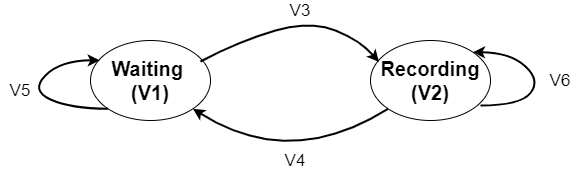

**Table and variable key**:

|Transition|Starting State|Transition Condition|Ending State|
|:---:|:---:|:---:|:---:|
|V3|V1|$X1$|V2|
|V4|V2|elapsed-startTime$\geq 5000$|V1|
|V5|V1|$\overline{X1}$|V1|
|V6|V2|elapsed-startTime $<5000$|V2|

```javascript
//X1 = button X1
//V1 = waiting state
//V2 = recording state
//V3 = transition from waiting to recording state
//V4 = transition from recording to waiting state
//V5 = latch on waiting state
//V6 = latch on recording state
```

**Code**

Code must be properly formatted. You will not receive credit for code that cannot be pasted directly into the simulator. Please ask for help if you are having trouble with the formatting.

```javascript
//BLOCK 1
BP = X1; //initializing button press
elapsed1 = millis(); // getting current time

if (V3) {
lastStoredTime1 = millis(); //recording time that button was pressed and recording began
}

//BLOCK 2
V3 = V1&&BP;
V4 = V2&&(elapsed1-lastStoredTime1>=5000);
V5 = V1&&!BP;
V6 = V2&&(elapsed1-lastStoredTime1<5000);

//BLOCK 3
V1 = V4||V5||SP0;
V2 = V3||V6;

//BLOCK 4
Y1 = V2;
VALVEPERCENT = 25; // this value can be changed to desired valve opening percentage
VALVE = V2;
REC = V2;
```

**Now that you have the ability to collect data from the dam system, what do we do with it?** 

In particular, how does it help us build a model for the system? How will it eventually help us predict how long the Tesla will need to charge?

The following sections present the relevant portions of a disciplined process you can use to help interpret results from a dynamic test like the one your FSM performs on the Dam system. We will add to this toolset as the semester progresses! This is just to get us started.

# *Model Development:* Constructing Models From Dynamic Tests

One of the most common ways to investigate a system's behavior when beginning to develop a model for its dynamics is to perform a test that involves changing the system's inputs and watching how its outputs evolve over time. By observing the relationships between the system's inputs and its outputs, we can often make determinations about what sort of mathematical model might be required to describe the system's behavior. 

## Step Response Tests

A "step input" is a common type of input used to investigate a system's dynamics. Colloquially, providing a system with a "step input" means that the system begins at an equillibrium defined by a steady-state input and a steady-state output. Then, the input is changed suddenly.

The unit step function (sometimes called the Heaviside step function after [Oliver Heaviside](https://en.wikipedia.org/wiki/Oliver_Heaviside)) is defined mathematically as:

\begin{equation}
u_s(t-t_0)=\left\{
\begin{matrix}
    1 & \forall t\geq t_0 \\
0&\forall t<t_0 \\
\end{matrix}
\right.
\end{equation}

Applying a step change in a system's input is often represented mathematically by applying a *scaled* version of the heaviside *unit* step function, which by definition has a magnitude of 1. Generally speaking, a step function of magnitude $U$ that occurs at time $t_0$ can be written:

$$\Delta u(t) = U\cdot u_s(t-t_0)$$

True Heaviside step functions represent *instantaneous change* in a system's input. Instantaneous changes are impossible in a physical system because they would require *infinite power* to achieve, but step functions are often a good approximation for "sudden" changes in a system's inputs. **Step response tests** are tests in which an approximate step change in a system's input is applied while the system's output(s) is/are measured.

A step response test is shown below, where the magnitude of the step input $\Delta u(t) = U = u_{ss}-u_0$.

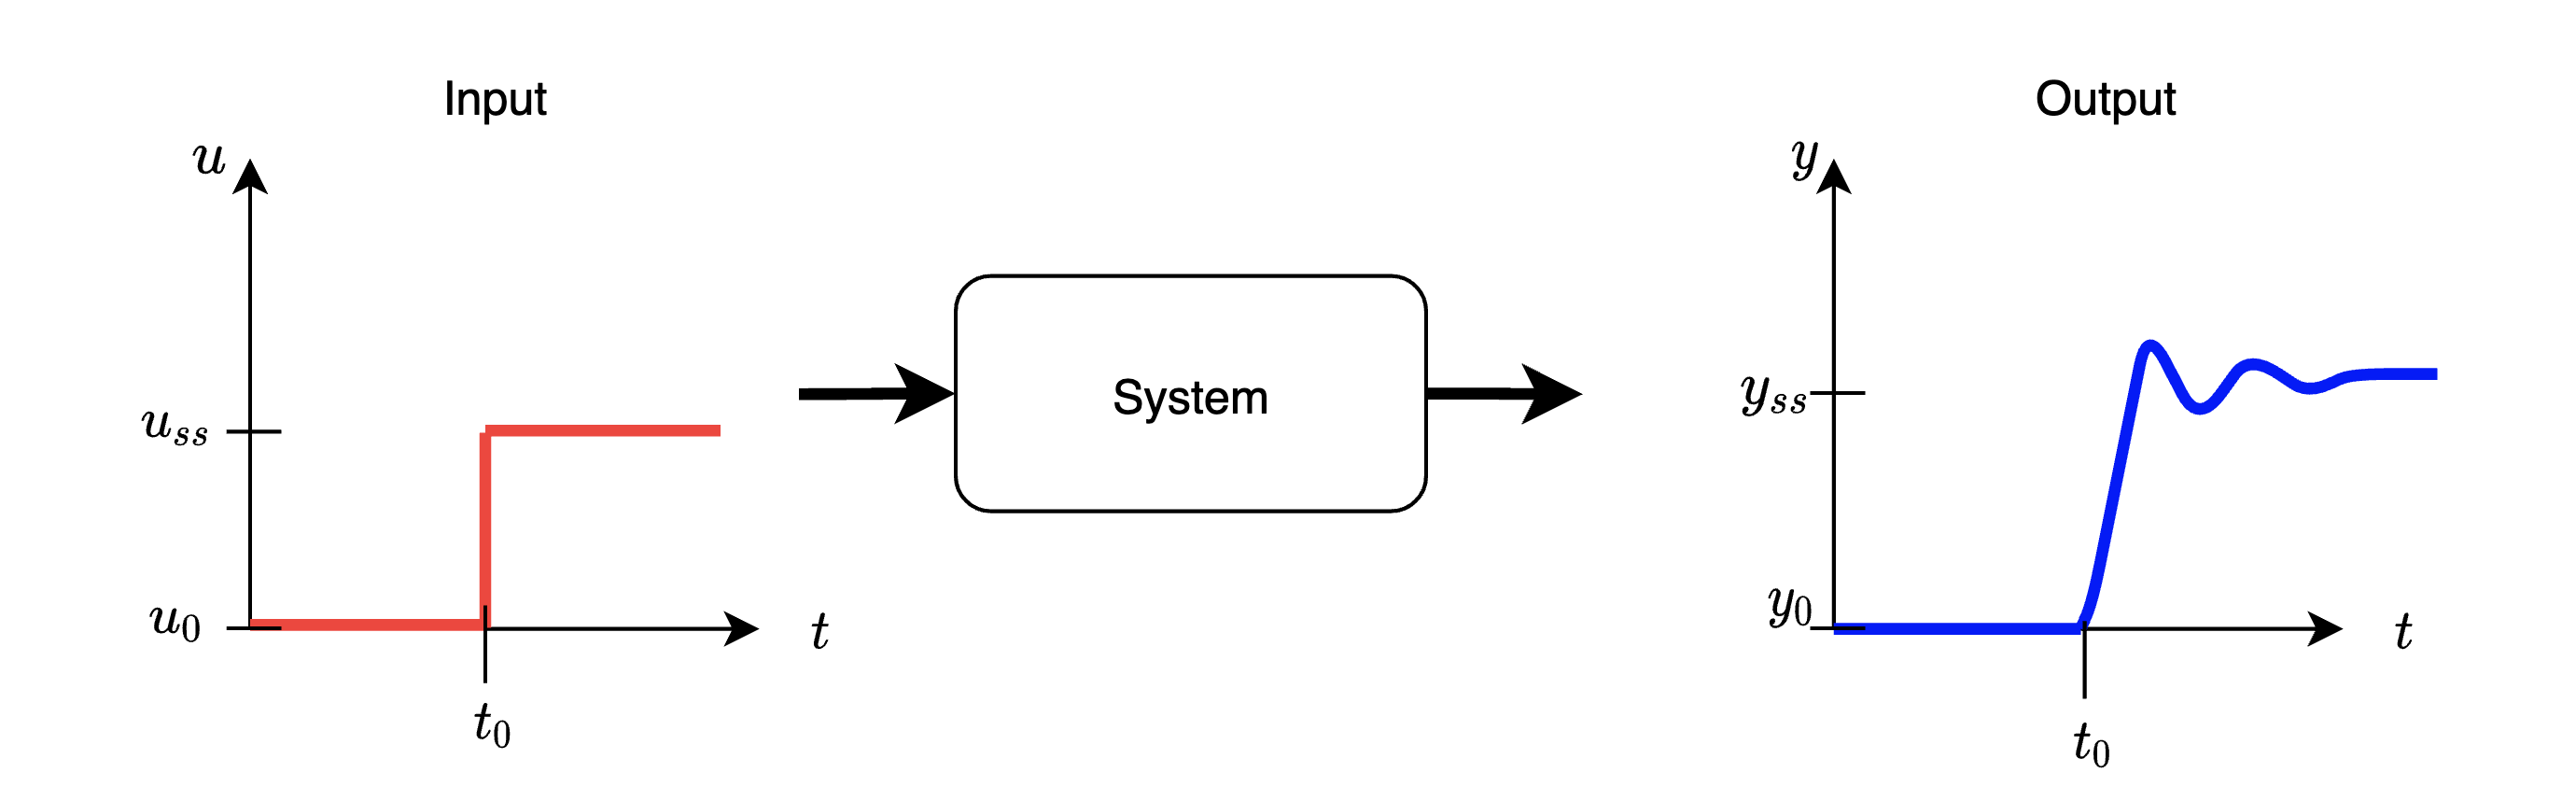

While the response above is generic, it has properties that many physical systems have. The output of the system changes, and eventually settles to a steady state or final value.

**So what can we learn from a step response test?**


## Experimentally determining local system stability from a step response test

There are several mathematical definitions of "Stability" for a dynamic system. In this course, when we say that a system is stable, we generally mean that it is "Bounded Input Bounded Output (BIBO)" stable. What does this mean? It means that for *any* finite input, the system will produce a finite output. 

Technically, "proving" that a system is *globally* stable in this way using experimental data would require giving the system *every possible input* and watching to make sure that its output stays finite. However, most systems are only subjected to a relatively small range of inputs. Consider your zumo or your lab rig's motor: you can only provide voltage inputs between 0 and 5V to the lab rig, so why worry about how the lab rig acts when it is fed 4,000 volts?

This is the concept of *local* stability, and without mathematical tools (which we will get to shortly), it's about all we can do to say that if a system is given step inputs with magnitudes within the range of interest, and the system reaches a *steady state*, it is *likely* stable. The figure below shows some examples of systems responding to step inputs:

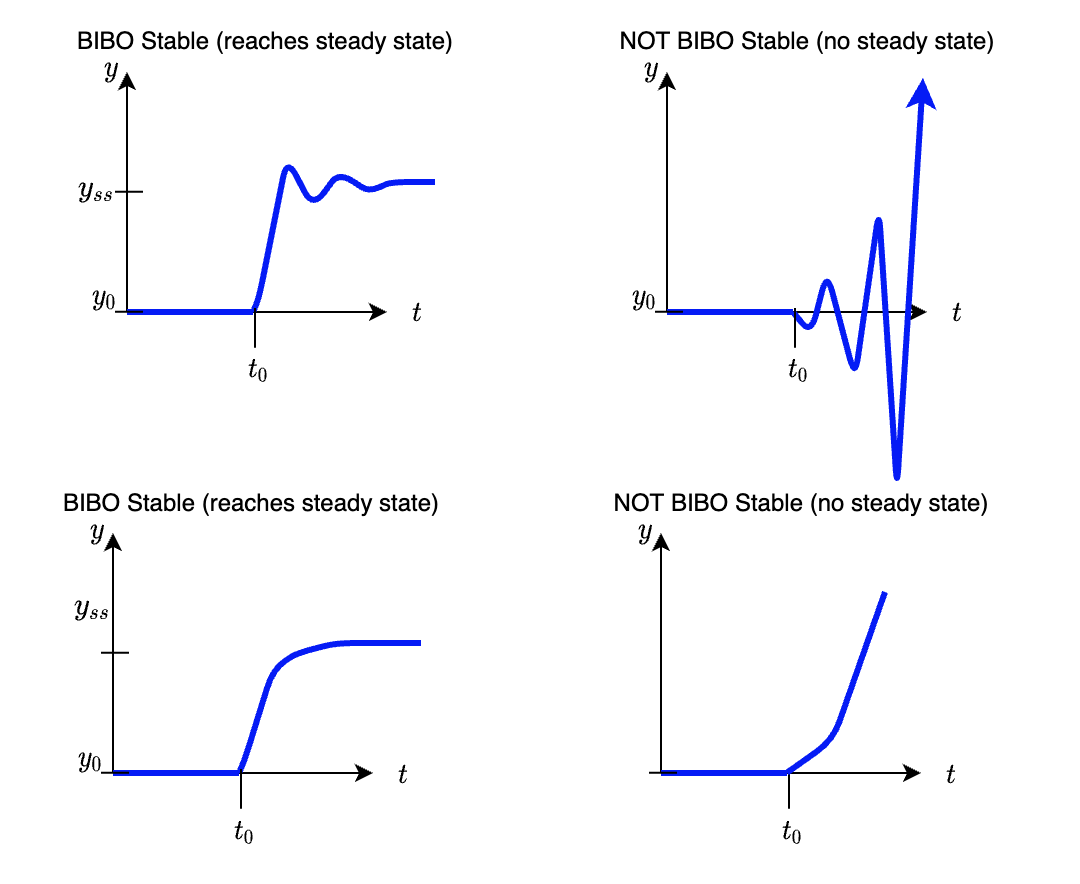

## Steady State in a step response test

For this purposes of this course, we define "steady state" behavior of a system in response to inputs that are nonperiodic (such as a step input) to occur when the output of the system is no longer changing. This definition changes slightly for periodic inputs (like sine waves).

## Steady State Gain in a step response test

*If a system reaches a steady state* (if it is BIBO stable), a dynamic test can also give us information about the steady state ratio of output to input for the system. Think of this like a "calibration:" it tells us "how much output" we get "per unit input" for the system. Mathemtatically, we can define steady state gain for a step response test as the **ratio of the change in output over the change in input for a step input** as:

$$K_{ss} = \frac{y_{ss}-y_0}{u_{ss}-u_0} = \frac{\Delta y_{ss}}{\Delta u_{ss}}$$ 

For other types of inputs, such as sinusoids, ramps, or impulse functions, the definition is slightly different, but the conceptual definition of steady state gain remains the same. It always tells us how much a system *amplifies* or *attenuates* its input.

## Linearity: the principle of superposition

A system is linear if it satisfies the principle of superposition:

>If an input change $\Delta u_1(t)$ produces an output change $\Delta y_1(t)$ and an input change $\Delta u_2(t)$ produces an output change $\Delta y_2(t)$, then 

>input change $\Delta u(t) = c_1\Delta u_1(t) + c_2 \Delta u_2(t)$ produces an output change $\Delta y(t) = c_1\Delta y_1(t)+c_2\Delta y_2(t)$ for all pairs of input changes $\Delta u_1(t),\Delta u_2(t)$ and constants $c_1,c_2$. 

>This means that the system satisfies the **principle of superposition**.

One key consequence of the principle stated above is that if one **doubles the input change $\Delta u(t)$ for a system, a *linear* system will produce exactly double the output change $\Delta y(t)$** at every time $t$.

Unfortunately, essentially all physical systems known to humans are both nonlinear and of essentially infinite order. However, given that we're often only concerned with the behavior of a system within certain small regions of inputs and initial conditions, many physical systems are approximately linear in a particular *region of interest* to an engineer.

Knowing whether a system behaved *linearly* for your expected range of inputs is very important beceause it tells us *what type of mathematical model* we should be thinking of constructing for our system. If the system behaves approximately linearly, we can use the rich set of tools in Ordinary Linear Differential Equations (ODE)s to build and analyze our model, including the Laplace Transform and the Transfer function.

## 2% Settling Time 

Settling time gives us an idea of how long the transients (changing behavior) of a dynamic system last. We use settling time to classify a system's dynamics as "fast" or "slow" relative to our control system's design goals, or when comparing one configuration of a system to another.

We will link settling time to mathematical models and their properties, but it is an empirical concept that can be obtained simply by analyzing a dataset. The 2% settling time is defined as the last time at which the system's output change $\Delta y(t) = y(t) - y_0$ has an absolute value that is greater than 2% away from $\Delta y_{ss} = y_{ss}-y_0$. This is illustrated graphically below for two systems, one of which is oscillatory, and another which reaches its steady state value asymptotically.

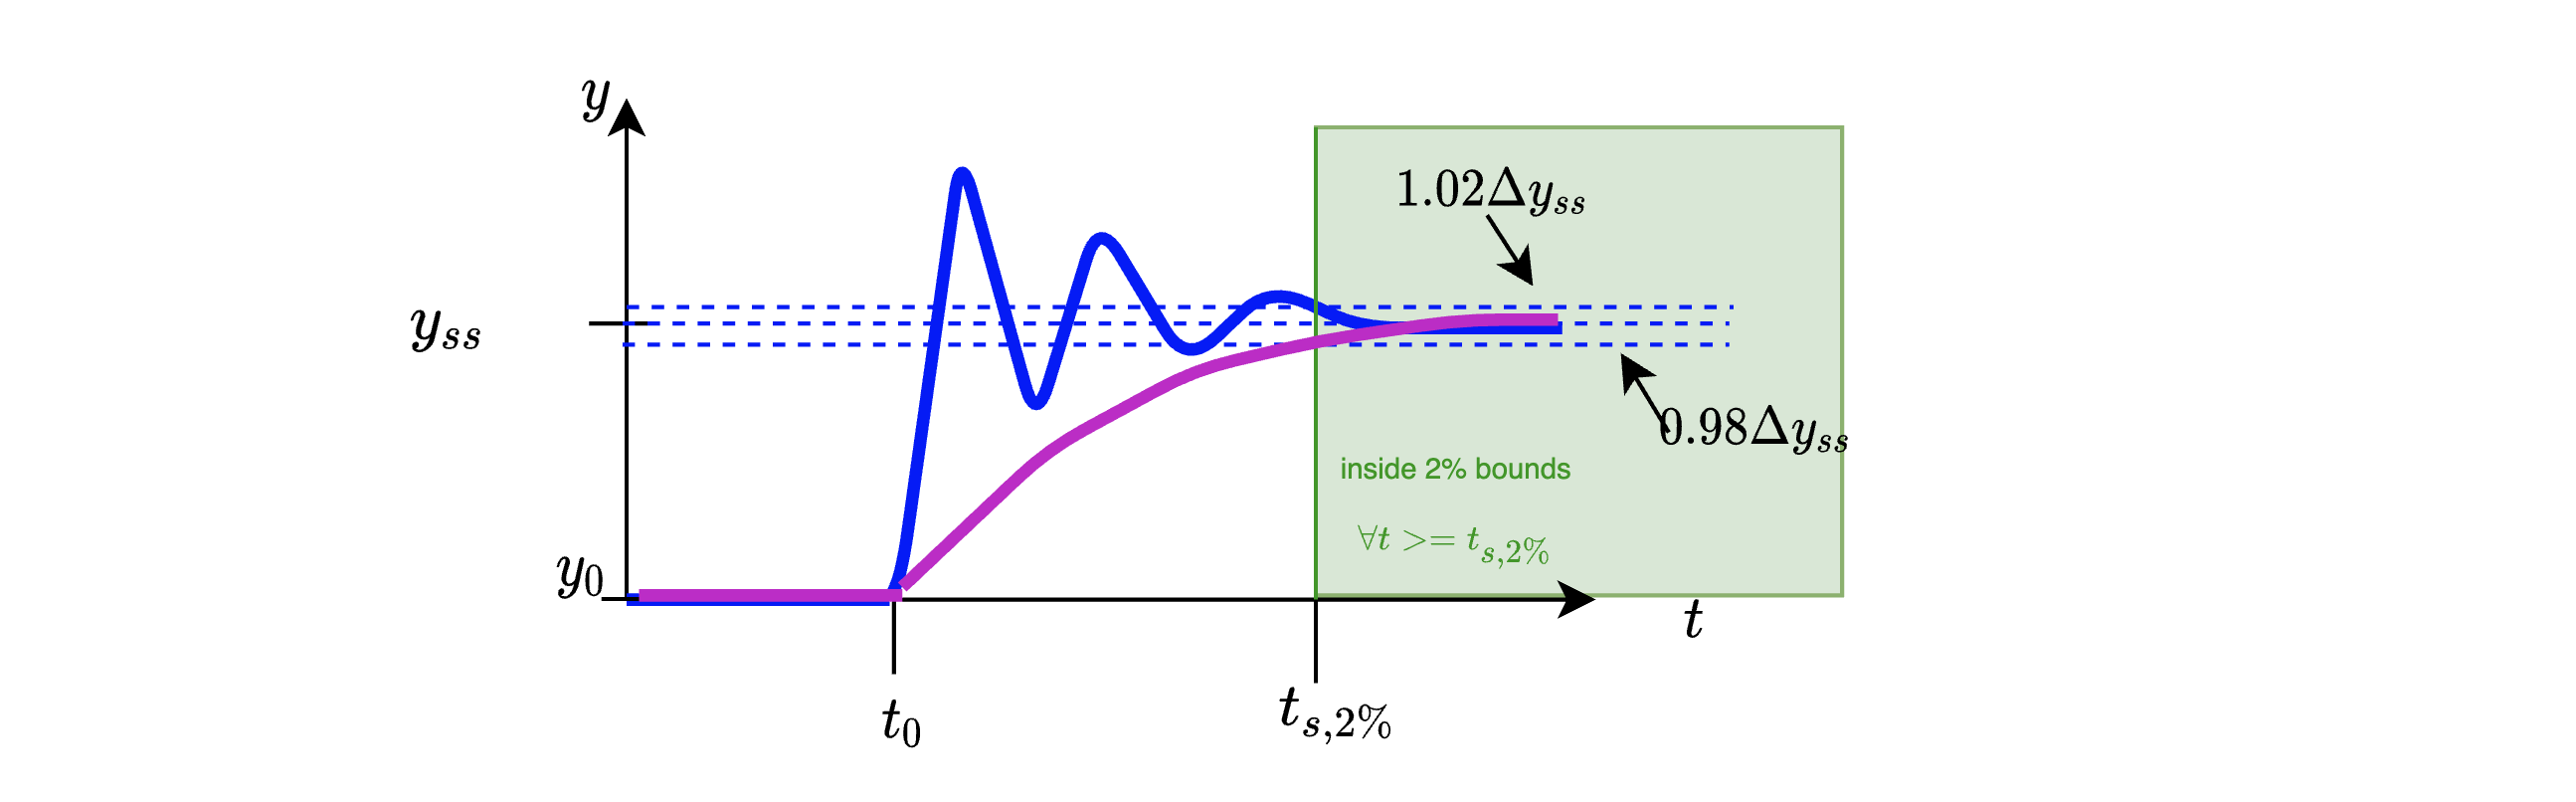

# Exercise 2: Due at the beginning of class on Monday, August 31

## *Model Development*: Interpret the Dam's behavior

Using your data-collection state machine above, modifying as necessary, collect two datasets from the dam system:

1. Dam begins overflowing. VALVEPERCENT begins at zero, and the turbine begins at rest. When X1 is pressed, VALVEPERCENT is increased to 25%. Data are collected for 5 seconds.
2. Dam begins overflowing. VALVEPERCENT begins at zero, and the turbine begins at rest. When X1 is pressed, VALVEPERCENT is increased to 50%. Data are collected for 5 seconds.

Save these datasets with descriptive names. Then, upload them to this assignment folder using the Jupyterhub files interface. This way, you can load them in an Octave (code) cell using something like:

```octave
data = load('myfilename.txt');
```

For plotting, manipulation, and analysis.

In the octave code cell below, load and plot relevant data from your two tests **on the same plot**, labeling axes appropriately. 

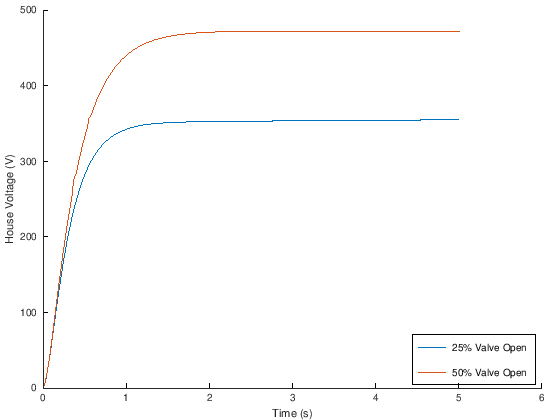

In [9]:
data25 = load('damdata25.txt');
data50 = load('damdata50.txt');
t25 = data25(:,1);
t50 = data50(:,1);
hvolt25 = data25(:,6);
hvolt50 = data50(:,6);
hold on;
plot(t25,hvolt25)
plot(t50,hvolt50)
xlabel('Time (s)')
ylabel('House Voltage (V)')
legend('25% Valve Open','50% Valve Open','Location','southeast')
hold off;

1. What is the steady state gain from valve percentage to house voltage for the 25% test?

In [10]:
y025 = data25(1,6);
yss25 = data25(end,6);
SSG25 = (yss25-y025)/25
% note: units for SSG are [V/%]

SSG25 =  14.196


The steady state gain from the valve percentage to house voltage for the 25% test is 14.2 V/%.

2. Is the dam system linear when considering the valve position as an input and the house voltage as an output? How do you know?

Considering the valve position as an input and house voltage as an output, the dam system is not linear. For the 25% valve open case the steady state house voltage reaches is 354.91 V. If we double the valve position input to 50%, we would expect to get a steady state house voltage of 2*354.91V = 709.82 V. In actuality, the steady state house voltage for when the valve is 50% open is 471.71 V, which is much different than 709.82 V. Thus, the dam system is nonlinear because when the input valve position is doubled, the output house voltage does not double.  

3. Does the settling time of the house voltage depend on the valve position setting?

In [11]:
% for 25% valve position
for j = length(hvolt25)-1:-1:1 % starting from last data point and iterating backwards
    y_diff = abs((yss25-hvolt25(j))/yss25)*100; % calculating percent difference
    if y_diff > 2 % checking if greater than 2%
        break; % stopping for loop if above 2%
    end
end
ts25 = t25(j)
% for 50% valve position
yss50 = data50(end,6);
for j = length(hvolt50)-1:-1:1 % starting from last data point and iterating backwards
    y_diff = abs((yss50-hvolt50(j))/yss50)*100; % calculating percent difference
    if y_diff > 2 % checking if greater than 2%
        break; % stopping for loop if above 2%
    end
end
ts50 = t50(j)

ts25 =  1.1842
ts50 =  1.3844


The settling time of the house voltage does depend on the valve position setting. As you can see from the small block of code above the 2% settling time for the data set with the 25% valve opening is 1.18 seconds, whereas for the 50% valve opening the 2% settling time is slightly larger at 1.38 seconds. Therefore, the settling time is somewhat dependent on the valve position setting.

4. Does the dam system appear to be BIBO stable for these tests?

The dam system does appear to be BIBO stable because for these two finite inputs, a finite house voltage output is produced. Basically for both 25% and 50% valve opening position, a finite steady state house voltage is achieved. 

Now, run a third test with a VALVEPERCENT setting of 100%, keeping all other variables the same. Use the code cell to plot your data from this third test **on the same plot** as the previous tests.

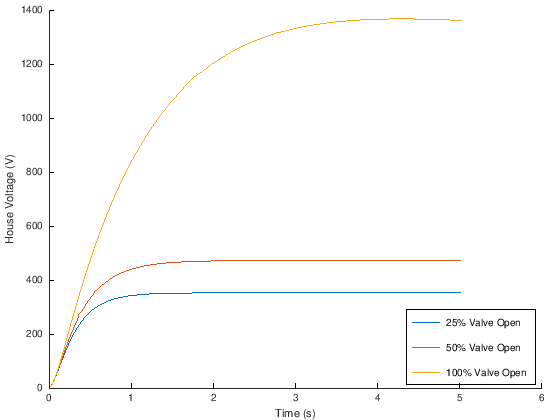

In [12]:
data100 = load('damdata100.txt');
t100 = data100(:,1);
hvolt100 = data100(:,6);
hold on;
plot(t25,hvolt25)
plot(t50,hvolt50)
plot(t100,hvolt100)
xlabel('Time (s)')
ylabel('House Voltage (V)')
legend('25% Valve Open','50% Valve Open','100% Valve Open','Location','southeast')
hold off;

Does this test change any of your conclusions above? Explain. 

If we were to just look at the 25% valve open ant 100% valve open cases, they appear to be more linearly related than the 50% and the 25%. For example, if we quadruple the valve position input to 100%, we would expect to get a steady state house voltage of 4*354.91V = 1419.64 V. Experimentally, the steady state house voltage for when the valve is 100% open is 1361.4 V, which is very close to 1419.64 V. Thus, had we looked at the case of 25% and 100% valve open, one might conclude that the dam system is linear or somewhat linear. Now looking at settling time, we can see even more pronounced that the 2% settling time is heavily dependent on the valve position setting and follows the trend that as valve position setting increases, so does the 2% settling time.